In [1]:
import librosa
import os

In [5]:
help(os)

Help on module os:

NAME
    os - OS routines for NT or Posix depending on what system we're on.

DESCRIPTION
    This exports:
      - all functions from posix or nt, e.g. unlink, stat, etc.
      - os.path is either posixpath or ntpath
      - os.name is either 'posix' or 'nt'
      - os.curdir is a string representing the current directory (always '.')
      - os.pardir is a string representing the parent directory (always '..')
      - os.sep is the (or a most common) pathname separator ('/' or '\\')
      - os.extsep is the extension separator (always '.')
      - os.altsep is the alternate pathname separator (None or '/')
      - os.pathsep is the component separator used in $PATH etc
      - os.linesep is the line separator in text files ('\r' or '\n' or '\r\n')
      - os.defpath is the default search path for executables
      - os.devnull is the file path of the null device ('/dev/null', etc.)
    
    Programs that import and use 'os' stand a better chance of being
    porta

In [6]:
help(librosa)

Help on package librosa:

NAME
    librosa - Top-level module for librosa

PACKAGE CONTENTS
    _cache
    beat
    core (package)
    decompose
    display
    effects
    feature (package)
    filters
    onset
    output
    segment
    sequence
    util (package)
    version

SUBMODULES
    audio
    constantq
    fft
    harmonic
    pitch
    spectrum
    time_frequency

DATA
    cache = <librosa._cache.CacheManager object>

VERSION
    0.7.1

FILE
    c:\users\rushi\anaconda3\lib\site-packages\librosa-0.7.1-py3.7.egg\librosa\__init__.py




In [16]:
os.listdir("../../wavs")

['Complicated.wav']

In [17]:
wavf_path = "../../wavs/Complicated.wav"

In [18]:
help(librosa.audio)

Help on module librosa.core.audio in librosa.core:

NAME
    librosa.core.audio - Core IO, DSP and utility functions.

FUNCTIONS
    autocorrelate(y, max_size=None, axis=-1)
        Bounded auto-correlation
        
        Parameters
        ----------
        y : np.ndarray
            array to autocorrelate
        
        max_size  : int > 0 or None
            maximum correlation lag.
            If unspecified, defaults to `y.shape[axis]` (unbounded)
        
        axis : int
            The axis along which to autocorrelate.
            By default, the last axis (-1) is taken.
        
        Returns
        -------
        z : np.ndarray
            truncated autocorrelation `y*y` along the specified axis.
            If `max_size` is specified, then `z.shape[axis]` is bounded
            to `max_size`.
        
        Notes
        -----
        This function caches at level 20.
        
        Examples
        --------
        Compute full autocorrelation of y
        


In [59]:
sm_wav = librosa.core.load(wavf_path, duration = 3)
sm_wav_shape = sm_wav[0].shape
sm_wav_shape, sm_wav


((66150,), (array([ 1.7540491e-07, -2.2954254e-07,  2.8726785e-07, ...,
         -1.2915371e-01, -1.2412427e-01, -1.2442409e-01], dtype=float32),
  22050))

In [41]:
import numpy
import matplotlib.pyplot as plt
D = librosa.stft(sm_wav[0])
D.shape

(1025, 130)

(array([ 19,  20,  21,  23,  24,  25,  28,  47,  48,  49,  71,  72,  73,
        196], dtype=int64),)

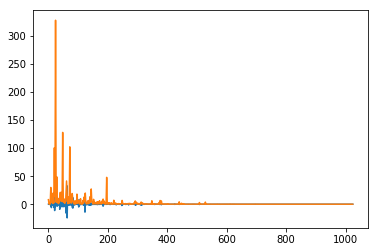

In [114]:
le = len(D)
x = numpy.arange(le)
plt.plot(x, D[:, 1])
sm = numpy.sum(D, axis = 1)
abss = numpy.abs(sm)
# plt.plot(x, abss)
xx = numpy.where(abss == numpy.max(abss))
mx = numpy.max(abss)
mn = numpy.min(abss)

# a = (abss - mn) / (mx - mn)
# sq = numpy.square(a)
# sqq= numpy.square(sq)
plt.plot(x, abss)
# plt.show()
numpy.where(abss > min(abss[abss > (0.1 * mx)]))


In [60]:
power = librosa.feature.melspectrogram(sm_wav[0])
print(power.shape)
import librosa

(128, 130)


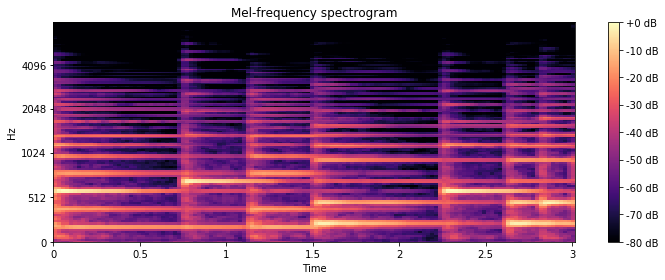

(128, 130)

In [116]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(power, ref=numpy.max)
librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel',
                          fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
S_dB.shape

AttributeError: module 'librosa' has no attribute 'display'